<h1 align="center">Astro Task</h1>


## Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Initializations

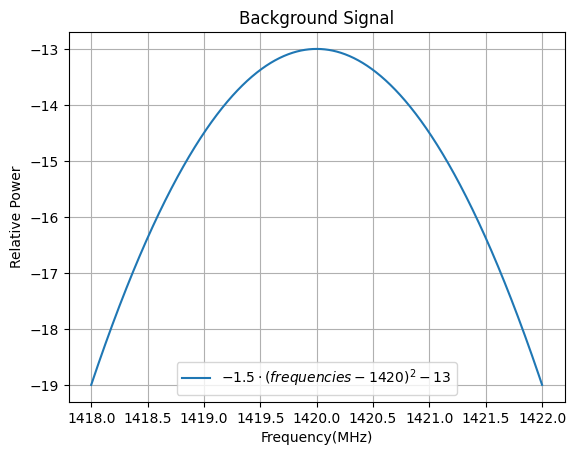

In [20]:
samples = 1024 # low class polyonymal,<5MHz bandwith
frequencies = np.linspace(1418,1422,samples) #from 1418 to 1421   
background_signal = -1.5*(frequencies - 1420)**2 -13 
plt.plot(frequencies,background_signal,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13$')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Background Signal")
plt.legend()
plt.grid(True)
plt.show()

## Add Gaussian Noise

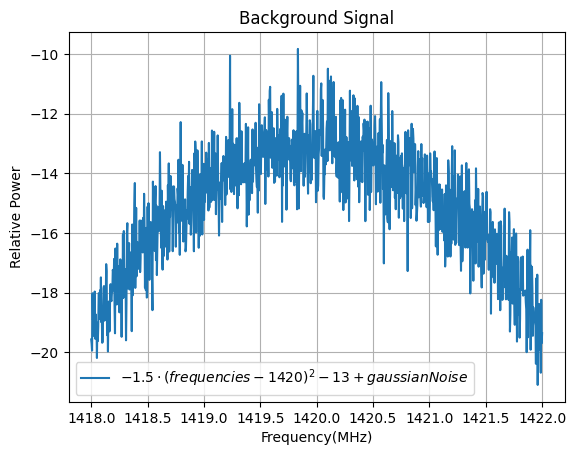

In [21]:
#Gaussian noise = deviation *randn(samples)
deviation = 0.3 # 
gaussian_noise = np.random.randn(samples) # generates random numbers with mean = 0 and variance 1
back_with_noise = background_signal + gaussian_noise # Gaussian noise applies to every single point in the signal
plt.plot(frequencies,back_with_noise,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13 + gaussianNoise$')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Background Signal")
plt.legend()
plt.grid(True)
plt.show()

## Signal in different time segments

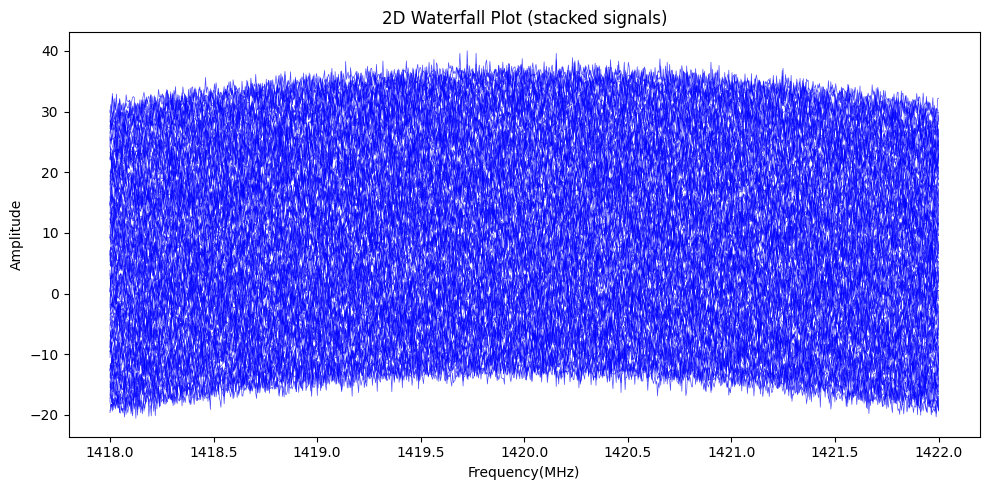

In [22]:
signals = [] #list that saves the signal for every time segment
time_segments = 100
for i in range(time_segments):
    gaussian_noise = np.random.randn(samples) # generates random numbers with mean = 0 and variance 1
    signal = background_signal + gaussian_noise # Gaussian noise applies to every single point in the signal
    signals.append(signal)
signals = np.array(signals) 
plt.figure(figsize=(10,5))
offset=0.5 # a small shift so the signals dont cover each other
for i in range(100):
    plt.plot(frequencies,signals[i,:] + i*offset , color='b' , alpha=0.7 , linewidth=0.5)
plt.xlabel("Frequency(MHz)")
plt.ylabel("Amplitude")
plt.title("2D Waterfall Plot (stacked signals)")
plt.tight_layout()
plt.show()

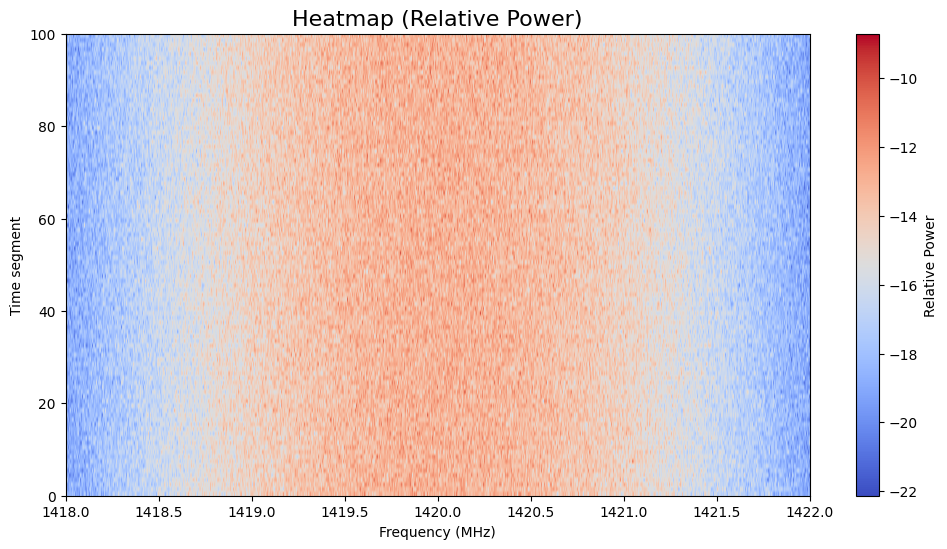

In [23]:
plt.figure(figsize=(12,6))
plt.imshow(signals, aspect='auto', origin='lower',extent=[frequencies[0], frequencies[-1], 0, signals.shape[0]], cmap='coolwarm') # create the x axes with the frequencies
plt.colorbar(label="Relative Power")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time segment")
plt.title("Heatmap (Relative Power)", fontsize=16)
plt.show()


## Changes of the background signal to be more realistic

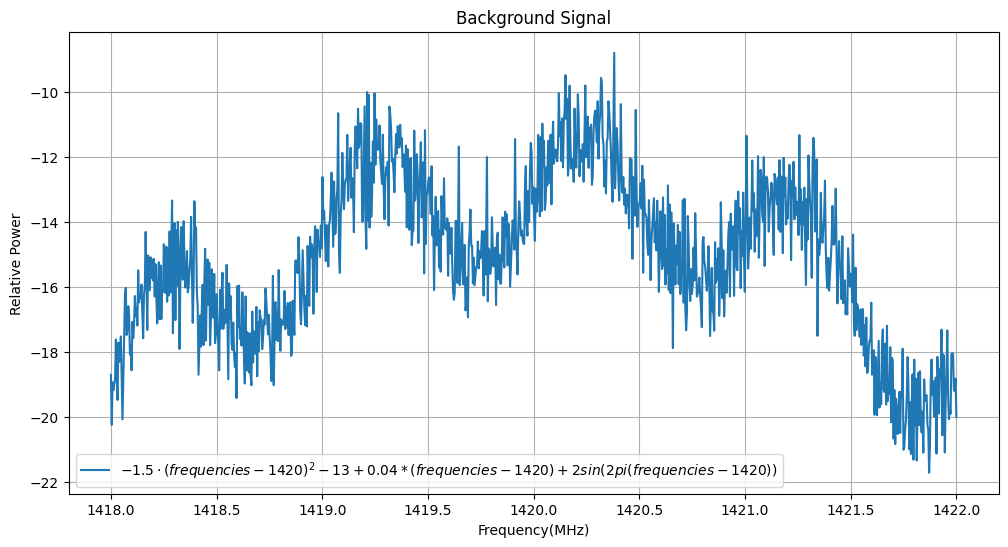

In [24]:
#make a slope in the signal because of 1)
slope = 0.04 * (frequencies-1420)
#we will add another curve component randomly because of 2)
tempSignal = 2*np.sin(2*np.pi * (frequencies-1420))
#We add them all together
finalBackgroundSignal = background_signal+slope+tempSignal
#We add noise
dev = 0.3 # 
noise = np.random.randn(samples) # generates random numbers with mean = 0 and variance 1
finalBackgroundSignalNoisy = finalBackgroundSignal + noise # Gaussian noise applies to every single point in the signal
plt.figure(figsize=(12,6))
plt.plot(frequencies,finalBackgroundSignalNoisy,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13 + 0.04 * (frequencies-1420) + 2sin(2pi(frequencies-1420)) $')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Background Signal")
plt.legend()
plt.grid(True)
plt.show()
off_signal = finalBackgroundSignalNoisy # create officialy the off signal to use it later

## Waterfall and Heatmap on the new signal

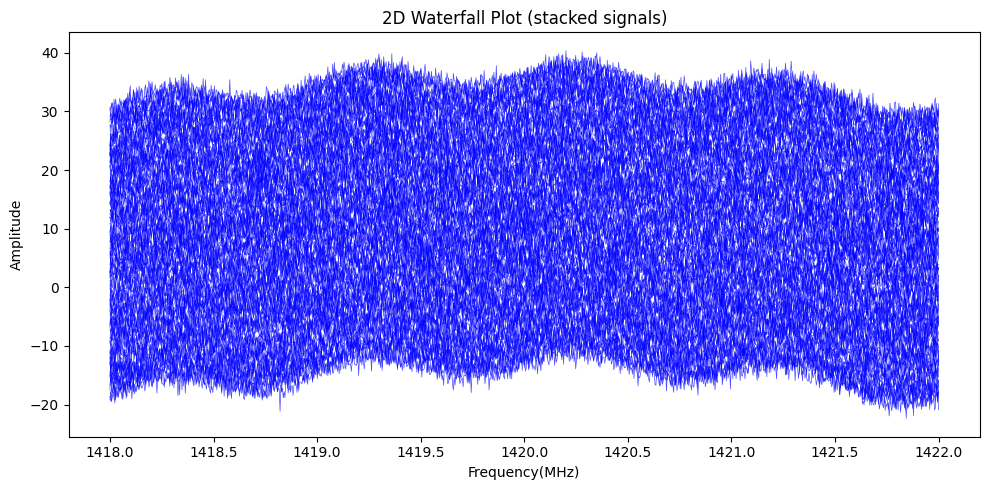

In [25]:
signals2 = [] #list that saves the signal for every time segment
for i in range(time_segments):
    gaussian_noise = np.random.randn(samples) # generates random numbers with mean = 0 and variance 1
    signal = finalBackgroundSignal + gaussian_noise # Gaussian noise applies to every single point in the signal
    signals2.append(signal)
signals2 = np.array(signals2) 
plt.figure(figsize=(10,5))
offset=0.5 # a small shift so the signals dont cover each other
for i in range(100):
    plt.plot(frequencies,signals2[i,:] + i*offset , color='b' , alpha=0.7 , linewidth=0.5)
plt.xlabel("Frequency(MHz)")
plt.ylabel("Amplitude")
plt.title("2D Waterfall Plot (stacked signals)")
plt.tight_layout()
plt.show()

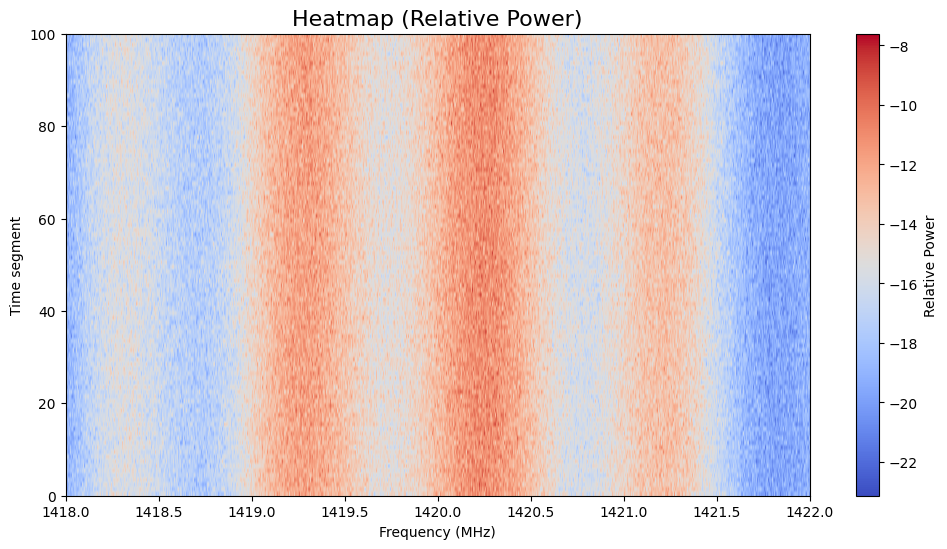

In [26]:
plt.figure(figsize=(12,6))
plt.imshow(signals2, aspect='auto', origin='lower',extent=[frequencies[0], frequencies[-1], 0, signals.shape[0]], cmap='coolwarm') # create the x axes with the frequencies
plt.colorbar(label="Relative Power")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time segment")
plt.title("Heatmap (Relative Power)", fontsize=16)
plt.show()


## Creation of "on" signal

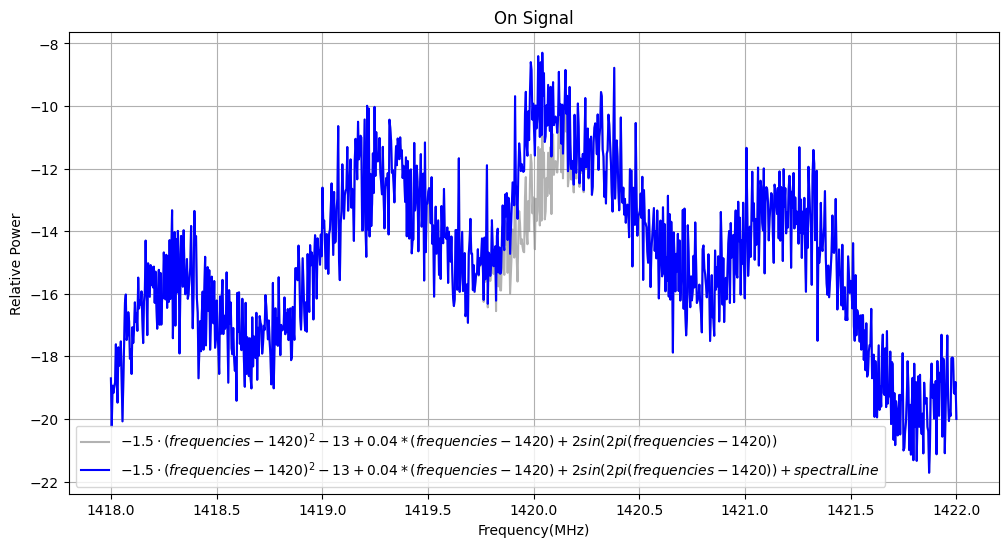

In [27]:
A = 3
FWHM = 0.2
sigma = FWHM/2.3548
line_center = 1420.0
spectral_line = A * np.exp(-0.5 * ((frequencies - line_center)/sigma)**2)
on_signal = off_signal + spectral_line
plt.figure(figsize=(12,6))
plt.plot(frequencies,off_signal,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13 + 0.04 * (frequencies-1420) + 2sin(2pi(frequencies-1420)) $',color = 'gray',alpha=0.6)
plt.plot(frequencies,on_signal,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13 + 0.04 * (frequencies-1420) + 2sin(2pi(frequencies-1420)) + spectralLine $',color='blue')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("On Signal")
plt.legend()
plt.grid(True)
plt.show()

## Creation of "on" signal over time segments

In [28]:
off_signals = signals2 # we made the off signal over time before
on_signals = [] 
time_segments = 100
for i in range(time_segments):
    on_signals.append(off_signals[i] + spectral_line) # on_signal is the off_signal with the spectral line at 1420MHz
on_signals = np.array(on_signals)

## Creation of "spectral" and "spectral2"

In [29]:
spectral = []
for i in range(time_segments):
    spectral.append(spectral_line) # add the spectral line for each time segments
spectral=np.array(spectral)
samples2 = 2*samples #double the samples
frequencies2 = np.linspace(1418,1422,samples2) #the frequencies changes because of the more samples
spectral_line2 = A * np.exp(-0.5 * ((frequencies2 - line_center)/sigma)**2) #use the same formula as before
spectral2 = []
for i in range(time_segments):
    spectral2.append(spectral_line2) # add the spectral line for each time segments
spectral2=np.array(spectral2)

## Averaging Over Time

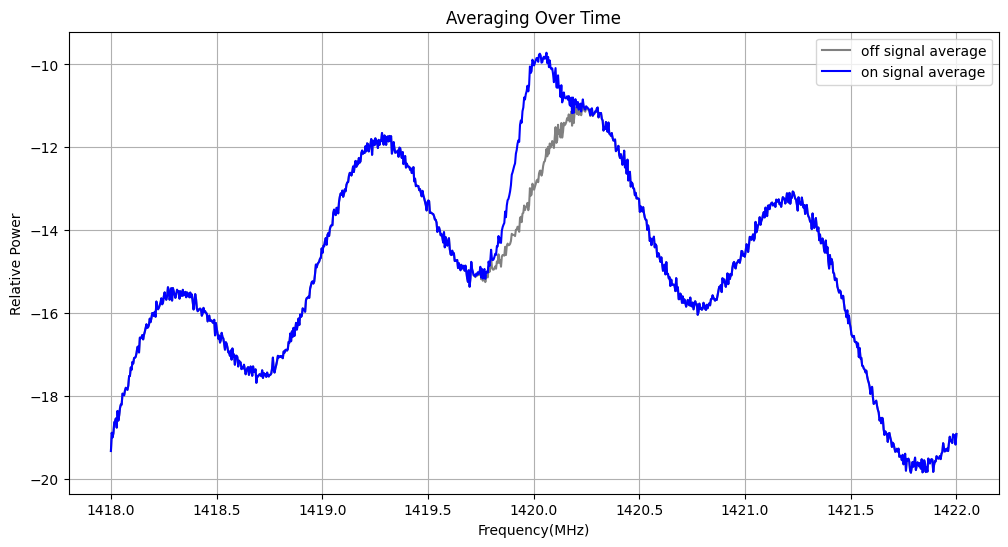

In [30]:
# of_signals - 100 different signals without the spectral lline_center
# on_signals - 100 deifferent signals with the spectral line
#Averaging over time means that i take the mean relative to the time

off_signal_avg = np.mean(off_signals,axis=0)# mean for every column(frequencies) the reuslt is 1D array with size nsamples
on_signal_avg = np.mean(on_signals,axis=0)
plt.figure(figsize=(12,6))
plt.plot(frequencies,off_signal_avg,label ="off signal average",color = 'gray')
plt.plot(frequencies,on_signal_avg,label = "on signal average",color='blue')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Averaging Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Removing Background

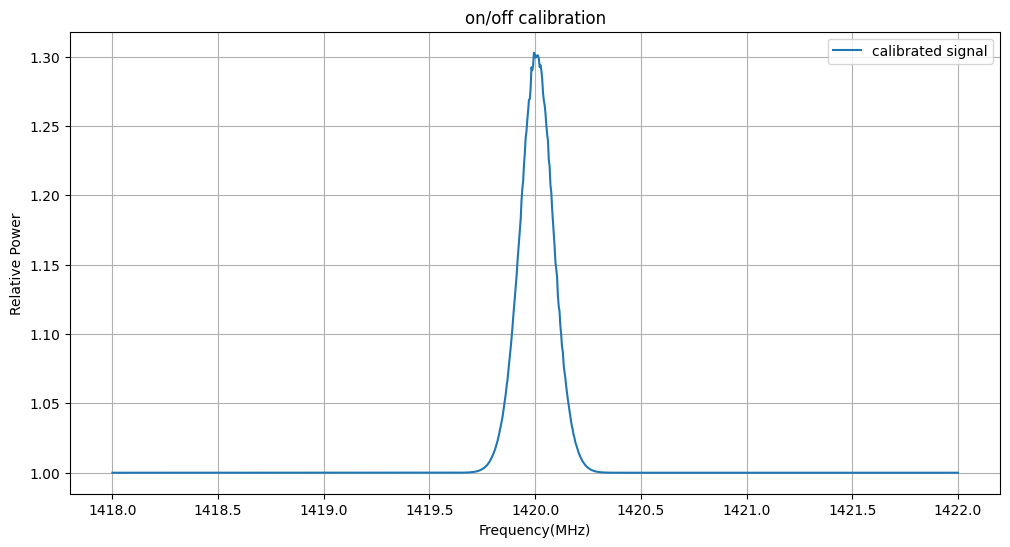

In [43]:
calibrated = off_signal_avg/on_signal_avg #i use of/on because my signal has negative power so on/off < 1 near the spectral line 
plt.figure(figsize=(12,6))
plt.plot(frequencies,calibrated,label ="calibrated signal")
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("on/off calibration")
plt.legend()
plt.grid(True)
plt.show()


## Moving Average

The selection of N relies on different parameters.Big N means bigger noise reduction but bigger analysis reduction.I will select N=5 because there is a small risk and good potential of smoothing.So (N-1)/2 = 2

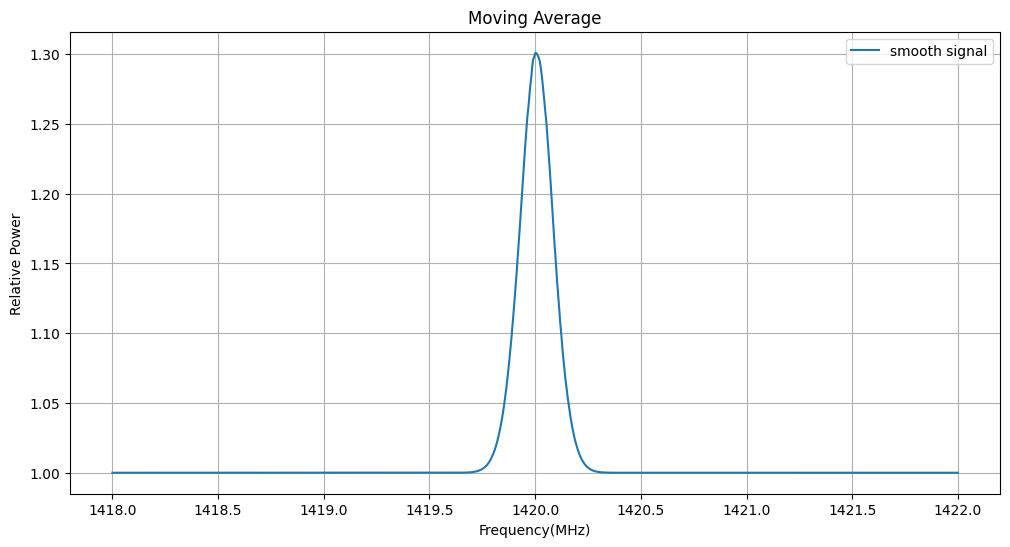

In [44]:
N=5
step = int((N-1)/2)
smooth=[]
smooth.append(calibrated[0])#we add the first element because 0-2=-2
smooth.append(calibrated[1]) # we add and the second element because 1-2=-1 
for i in range(2 , calibrated.size - 2): # also the two last elements can not be averaged 
    sum=0
    for j in range(i-step,i+step+1):
        sum+=calibrated[j]
    smooth.append(sum/5) # 2 elements before 2 elements after and the current element so we have 5 elements,we count the mean and append it in the smooth list    
smooth.append(calibrated[-2]) # we add the element before last
smooth.append(calibrated[-1]) # we add the last element
smooth = np.array(smooth)
plt.figure(figsize=(12,6))
plt.plot(frequencies,smooth,label ="smooth signal")
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Moving Average")
plt.legend()
plt.grid(True)
plt.show()

## Spectral Line Detection